In [2]:
# Install packages
import Pkg
Pkg.instantiate()
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`
   Updating registry at `~/.julia/registries/JuliaComputingRegistry`
  Resolving package versions...
   Updating `~/ShallowWaters.jl/Project.toml`
  [d330b81b] + PyPlot v2.9.0
   Updating `~/ShallowWaters.jl/Manifest.toml`
  [3da002f7] + ColorTypes v0.10.9
  [5ae59095] + Colors v0.12.4
  [53c48c17] + FixedPointNumbers v0.8.4
  [b964fa9f] + LaTeXStrings v1.2.0
  [1914dd2f] + MacroTools v0.5.6
  [438e738f] + PyCall v1.92.1
  [d330b81b] + PyPlot v2.9.0
  [189a3867] + Reexport v0.2.0


In [3]:
# Import Packages
using PyPlot
using ShallowWaters

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260
┌ Info: Precompiling ShallowWaters [56019723-2d87-4a65-81ff-59d5d8913e3c]
└ @ Base loading.jl:1260


# Double Gyre Example

## Run Integration

In [4]:
P = RunModel(Ndays=100, nx=100, L_ratio=1, bc="nonperiodic",
             wind_forcing_x="double_gyre", topography="seamount")

Starting ShallowWaters on Sat, 14 Nov 2020 16:08:12 without output.
100% Integration done in 15.9s.


ShallowWaters.PrognosticVars{Float32}(Float32[0.0022185922 0.00385089 … -0.0065850844 -0.00083484576; 0.0062243287 0.009498938 … -0.017286073 -0.002825621; … ; -0.004096258 -0.007868949 … 0.0012447764 0.0006511054; -0.0013609382 -0.002613597 … 0.00044030146 0.00017750739], Float32[-0.0022555795 -0.0061380677 … -0.0074942 -0.0008736203; -0.004047874 -0.009733308 … -0.012768304 -0.0020292; … ; -0.0027770284 -0.008071588 … -0.001223702 -0.00044600962; -0.0014008377 -0.0040520006 … -0.00056518795 -0.00015077305], Float32[0.11778253 0.117520414 … -0.053433973 -0.05307449; 0.11602407 0.11506872 … -0.054373845 -0.05280769; … ; -0.02574268 -0.025015382 … -0.0031282592 -0.0032562215; -0.02742144 -0.027217183 … -0.0027279435 -0.0027471543], Float32[1.0 0.9999996 … 0.0012521422 0.00015401824; 0.9999998 0.99999964 … 0.004494297 0.00038201915; … ; 1.0 0.99999946 … 4.6f-44 0.0; 1.0 0.9999992 … 0.0 0.0])

## Plot Results

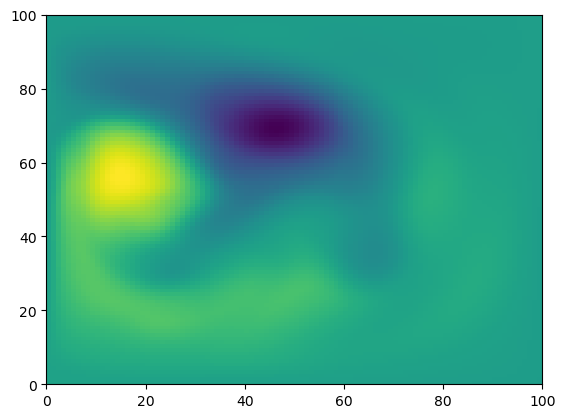

PyObject <matplotlib.collections.QuadMesh object at 0x7fb8ebc00f40>

In [5]:
pcolormesh(P.η')

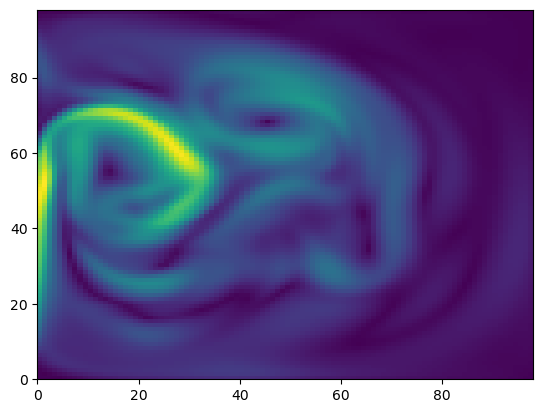

PyObject <matplotlib.collections.QuadMesh object at 0x7f9ed3696910>

In [14]:
speed = sqrt.(Ix(P.u.^2)[:,2:end-1] + Iy(P.v.^2)[2:end-1,:])
pcolormesh(speed')

# Varying Parameters

In [17]:
P2 = RunModel(Ndays=100, nx=100, L_ratio=0.2, bc="nonperiodic",
              wind_forcing_x="double_gyre", topography="seamount")

Starting ShallowWaters on Sat, 14 Nov 2020 12:21:06 without output.
100% Integration done in 34.3s.


ShallowWaters.PrognosticVars{Float32}(Float32[-0.0024183127 -0.0060218615 … 0.0012671715 0.00081909826; -0.0066871713 -0.016489672 … 0.0035886916 0.002390326; … ; 0.0012137335 0.0014564359 … -4.727105f-5 -0.0005941199; 0.00051046023 0.0007080002 … -0.00024775075 -0.00039056892], Float32[0.002361393 0.008322823 … 0.001883677 0.0007186224; 0.004212478 0.014621784 … 0.0036922335 0.0014715667; … ; 0.0006643202 0.0013740489 … 0.00021843112 0.00031162743; 0.00046939665 0.0011365908 … 0.0008523847 0.0004978422], Float32[-0.044111222 -0.04378473 … -0.2939862 -0.29420128; -0.045375407 -0.04423165 … -0.29302523 -0.29362807; … ; -0.20608184 -0.2062145 … -0.23987812 -0.23984179; -0.20755082 -0.2075905 … -0.23920573 -0.23922671], Float32[1.0 0.9999999 … 0.0 0.0; 1.0 0.9999996 … 0.0 0.0; … ; 0.9999999 0.9999996 … 0.0 0.0; 0.9999995 0.99999934 … 0.0 0.0])

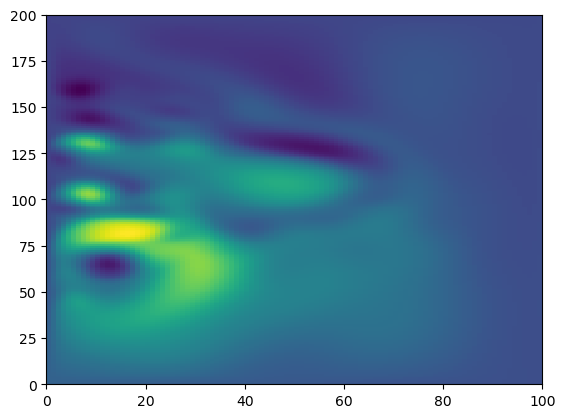

PyObject <matplotlib.collections.QuadMesh object at 0x7f9ed5d38520>

In [26]:
pcolormesh(P2.η')

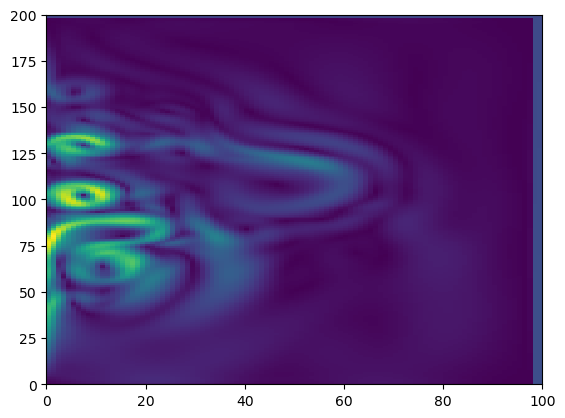

PyObject <matplotlib.collections.QuadMesh object at 0x7f9ed54c6130>

In [25]:
speed = sqrt.(Ix(P2.u.^2)[:, 2:end-1] + Iy(P2.v.^2)[2: end-1, :])
pcolormesh(speed')

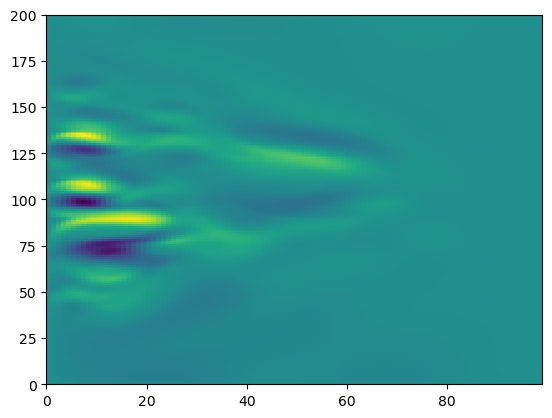

PyObject <matplotlib.collections.QuadMesh object at 0x7f9ed449b2b0>

In [22]:
pcolormesh(P2.u')
# pcolormesh(P2.v')

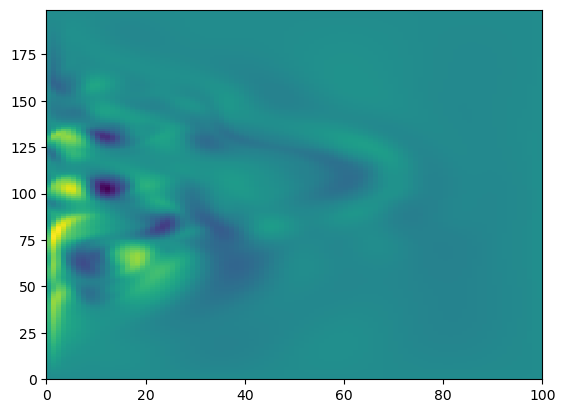

PyObject <matplotlib.collections.QuadMesh object at 0x7f9ed4f5a460>

In [23]:
pcolormesh(P2.v')

In [6]:
?Parameter

search: Parameter



Creates a Parameter struct with following options and default values

```
T::DataType=Float32                 # number format

Tprog::DataType=T                   # number format for prognostic variables
Tcomm::DataType=Tprog               # number format for ghost-point copies

# DOMAIN RESOLUTION AND RATIO
nx::Int=100                         # number of grid cells in x-direction
Lx::Real=2000e3                     # length of the domain in x-direction [m]
L_ratio::Real=2                     # Domain aspect ratio of Lx/Ly

# PHYSICAL CONSTANTS
g::Real=10.                         # gravitational acceleration [m/s]
H::Real=500.                        # layer thickness at rest [m]
ρ::Real=1e3                         # water density [kg/m^3]
ϕ::Real=45.                         # central latitude of the domain (for coriolis) [°]
ω::Real=2π/(24*3600)                # Earth's angular frequency [s^-1]
R::Real=6.371e6                     # Earth's radius [m]

# WIND FORCING OPTIONS
wind_forcing_x::String="channel"    # "channel", "double_gyre", "shear","constant" or "none"
wind_forcing_y::String="constant"   # "channel", "double_gyre", "shear","constant" or "none"
Fx0::Real=0.12                      # wind stress strength [Pa] in x-direction
Fy0::Real=0.0                       # wind stress strength [Pa] in y-direction
seasonal_wind_x::Bool=false         # Change the wind stress with a sine of frequency ωFx,ωFy
seasonal_wind_y::Bool=false         # same for y-component
ωFx::Real=1.0                       # frequency [1/year] for x component
ωFy::Real=1.0                       # frequency [1/year] for y component

# BOTTOM TOPOGRAPHY OPTIONS
topography::String="ridge"          # "ridge", "seamount", "flat", "ridges", "bathtub"
topo_height::Real=50.               # height of seamount [m]
topo_width::Real=300e3              # horizontal scale [m] of the seamount

# SURFACE RELAXATION
surface_relax::Bool=false           # yes?
t_relax::Real=100.                  # time scale of the relaxation [days]
η_refh::Real=5.                     # height difference [m] of the interface relaxation profile
η_refw::Real=50e3                   # width [m] of the tangent used for the interface relaxation

# SURFACE FORCING
surface_forcing::Bool=false         # yes?
ωFη::Real=1.0                       # frequency [1/year] for surfance forcing
A::Real=3e-5                        # Amplitude [m/s]
ϕk::Real=ϕ                          # Central latitude of Kelvin wave pumping
wk::Real=10e3                       # width [m] in y of Gaussian used for surface forcing

# TIME STEPPING OPTIONS
RKo::Int=4                          # Order of the RK time stepping scheme (2,3 or 4)
cfl::Real=1.0                       # CFL number (1.0 recommended for RK4, 0.6 for RK3, 0.1 for RK2)
Ndays::Real=10.0                    # number of days to integrate for
nstep_diff::Int=1                   # diffusive part every nstep_diff time steps.
nstep_advcor::Int=0                 # advection and coriolis update every nstep_advcor time steps.
                                    # 0 means it is included in every RK4 substep

# BOUNDARY CONDITION OPTIONS
bc::String="periodic"               # "periodic" or anything else for nonperiodic
α::Real=2.                          # lateral boundary condition parameter
                                    # 0 free-slip, 0<α<2 partial-slip, 2 no-slip

# MOMENTUM ADVECTION OPTIONS
adv_scheme::String="ArakawaHsu"     # "Sadourny" or "ArakawaHsu"
dynamics::String="nonlinear"        # "linear" or "nonlinear"

# BOTTOM FRICTION OPTIONS
bottom_drag::String="quadratic"     # "linear", "quadratic" or "none"
cD::Real=1e-5                       # bottom drag coefficient [dimensionless] for quadratic
τD::Real=300.                       # bottom drag coefficient [days] for linear

# DIFFUSION OPTIONS
diffusion::String="constant"        # "Smagorinsky" or "constant", biharmonic in both cases
νB::Real=500.0                      # [m^2/s] scaling constant for constant biharmonic diffusion
cSmag::Real=0.15                    # Smagorinsky coefficient [dimensionless]

# TRACER ADVECTION
tracer_advection::Bool=true         # yes?
tracer_relaxation::Bool=false       # yes?
tracer_consumption::Bool=false      # yes?
tracer_pumping::Bool=false          # yes?
injection_region::String="west"     # "west", "south", "rect" or "flat"
sst_initial::String="south"         # "west", "south", "rect", "flat" or "restart"
sst_rect_coords::Array{Float64,1}=[0.,0.15,0.,1.0]
                                    # (x0,x1,y0,y1) are the size of the rectangle in [0,1]
Uadv::Real=0.25                     # Velocity scale [m/s] for tracer advection
SSTmax::Real=1.                     # tracer (sea surface temperature) max for restoring
SSTmin::Real=0.                     # tracer (sea surface temperature) min for restoring
τSST::Real=500.                     # tracer restoring time scale [days]
jSST::Real=365.                     # tracer consumption [days]
SST_λ0::Real=222e3                  # [m] transition position of relaxation timescale
SST_λs::Real=111e3                  # [m] transition width of relaxation timescale
SST_γ0::Real=8.35                   # [days] injection time scale
SSTw::Real=5e3                      # width [m] of the tangent used for the IC and interface relaxation
SSTϕ::Real=0.5                      # latitude/longitude fraction ∈ [0,1] of sst edge

# OUTPUT OPTIONS
output::Bool=false                  # netcdf output?
output_vars::Array{String,1}=["u","v","η","sst"]  # which variables to output? q,ζ,du,dv,dη also allowed.
output_dt::Real=6                   # output time step [hours]
outpath::String=pwd()               # path to output folder

# INITIAL CONDITIONS
initial_cond::String="rest"         # "rest" or "ncfile" for restart from file
initpath::String=outpath            # folder where to pick the restart files from
init_run_id::Int=0                  # run id for restart from run number
init_starti::Int=-1                 # timestep to start from (-1 meaning last)
get_id_mode::String="continue"      # How to determine the run id: "continue" or "fill"
run_id::Int=-1                      # Output with a specific run id
init_interpolation::Bool=true       # Interpolate the initial conditions in case grids don't match?
```


In [12]:
P3 = RunModel(Ndays=200, nx=100, L_ratio=1, bc="periodic",
              wind_forcing_x="shear", topography="ridges", output=true)

Starting ShallowWaters run 1 on Sat, 14 Nov 2020 17:02:16
Model integration will take approximately 32.0s,
and is hopefully done on Sat, 14 Nov 2020 17:02:48
1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%68%69%70%71%72%73%74%75%76%77%78%79%80%81%82%83%84%85%86%87%88%89%90%91%92%93%94%95%96%97%98%99%100% Integration done in 33.9s.
All data stored.


ShallowWaters.PrognosticVars{Float32}(Float32[-0.12128898 -0.580358 … 1.1562161 0.96330184; -0.11500958 -0.57733524 … 1.2418984 1.0645661; … ; -0.159873 -0.633783 … 1.0301024 0.81817776; -0.13762769 -0.60151 … 1.0909642 0.88327414], Float32[-0.0066618784 -0.011553883 … 0.179718 0.097990595; -0.000111894056 0.006042124 … 0.19980016 0.09897884; … ; -0.021841064 -0.052394893 … 0.13122125 0.067452684; -0.015955111 -0.035317805 … 0.15140466 0.08281436], Float32[-6.65517 -6.5921903 … -6.6161118 -6.904464; -6.656744 -6.593933 … -6.5877333 -6.9047055; … ; -6.6500964 -6.58126 … -6.6603494 -6.903499; -6.652905 -6.587903 … -6.6408777 -6.904401], Float32[0.99999946 0.99999976 … 0.0020230124 0.00082205527; 0.99999964 0.99999976 … 0.002131074 0.00081738445; … ; 0.99999964 0.9999997 … 0.0018057477 0.00080346235; 0.9999995 0.99999976 … 0.001909274 0.00081666646])

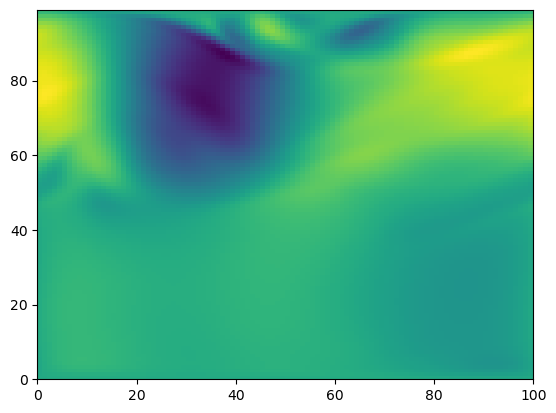

PyObject <matplotlib.collections.QuadMesh object at 0x7fb8d86d30a0>

In [11]:
pcolormesh(P3.v')

In [10]:
P3.η'

ShallowWaters.PrognosticVars{Float32}(Float32[-0.08120389 -0.36890772 … 0.52524453 0.36530894; -0.07529765 -0.3632917 … 0.6383771 0.48298168; … ; -0.114275925 -0.41877863 … 0.32093063 0.16903773; -0.09518046 -0.38907745 … 0.4213665 0.26117802], Float32[-0.006129251 -0.012892417 … 0.22753327 0.11634044; -0.00065092026 0.0020754535 … 0.23295243 0.117416024; … ; -0.018783513 -0.04733455 … 0.19415446 0.09274854; -0.013687441 -0.0326836 … 0.21034007 0.10509727], Float32[-4.79765 -4.757957 … -5.292361 -5.4158936; -4.798865 -4.7595863 … -5.253164 -5.4073067; … ; -4.793646 -4.748476 … -5.366672 -5.4366717; -4.7958755 -4.7542133 … -5.3307333 -5.426036], Float32[0.9999998 0.9999998 … 8.362222f-13 6.738318f-12; 0.99999994 0.99999976 … 7.828074f-13 6.5084747f-12; … ; 0.9999999 0.9999998 … 9.532616f-13 7.2640956f-12; 0.99999994 0.9999998 … 8.9355796f-13 7.0150366f-12])